In [163]:
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

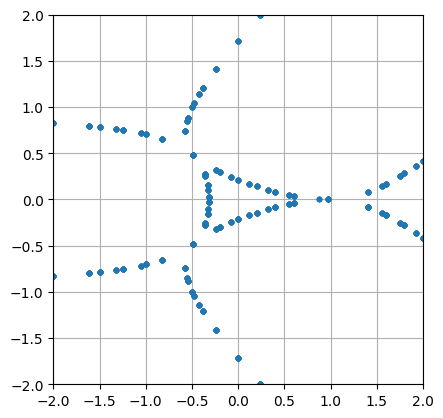

In [164]:
data = pd.read_csv('./original_phase_diagram.csv')
data.drop_duplicates()
x = data['x']
y = data['y']
plt.plot(x,y,'.')
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.show()

In [169]:
points = data.drop_duplicates()
points = points.dropna()
points = points.reset_index(drop=True)

In [170]:
drop_idx_1 = [86,88]
for i, point in points.iterrows():
    if point[0]>-0.3:
        drop_idx_1.append(i)
    elif point[1]>0.825081:
        drop_idx_1.append(i)
    elif point[1]<-0.825081:
        drop_idx_1.append(i)
first_part = points.drop(drop_idx_1)
first_part = first_part.sort_values('y')
lst_1 = first_part.index.to_list()

drop_idx_2 = []
drop_idx_2.extend(lst_1)
for i, point in points.iterrows():
    if point[0]>1 or point[0]<-1:
        drop_idx_2.append(i)
drop_idx_2.remove(120)
drop_idx_2.remove(122)
second_part = points.drop(drop_idx_2)
second_part = second_part.sort_values('y')
lst_2 = second_part.index.to_list()

drop_idx_3 =[]
for i, point in points.iterrows():
    if point[0]<0.7:
        drop_idx_3.append(i)
third_part = points.drop(drop_idx_3)
third_part = third_part.sort_values('y')


/tmp/ipykernel_58494/287922195.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if point[0]>-0.3:
/tmp/ipykernel_58494/287922195.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]>0.825081:
/tmp/ipykernel_58494/287922195.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]<-0.825081:
/tmp/ipykernel_58494/287922195.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a f

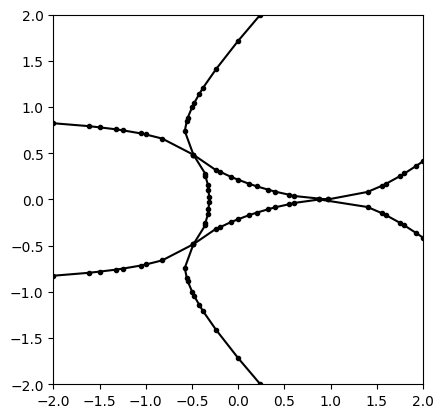

In [177]:
first_part = points.drop(drop_idx_1)
first_part = first_part.sort_values('y')

second_part = points.drop(drop_idx_2)
second_part = second_part.sort_values('y')

third_part = points.drop(drop_idx_3)
third_part = third_part.sort_values('y')

x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'.-',color='black')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '.-', color = 'black')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '.-', color = 'black')
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

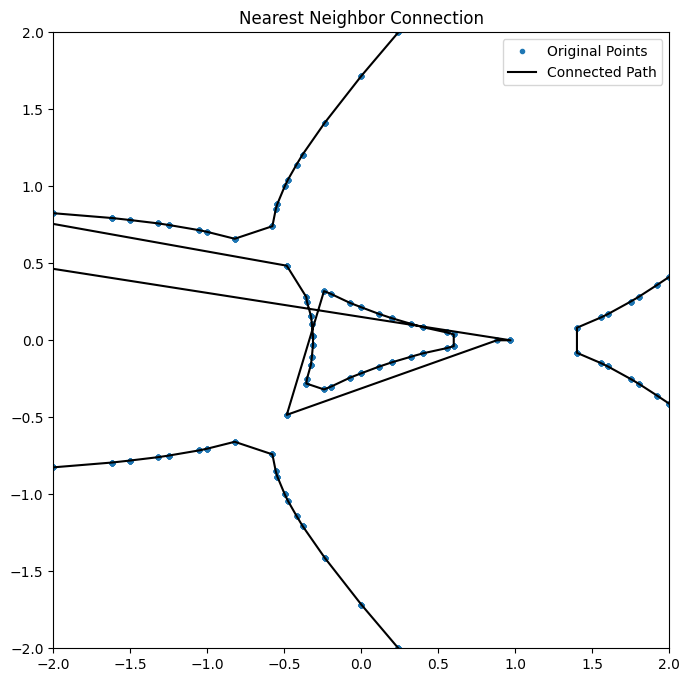

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your uploaded data
data = pd.read_csv('./original_phase_diagram.csv')
x = data['x'].values
y = data['y'].values

# Stack x and y into (N, 2) array of points
points = np.column_stack((x, y))

# Initialize: none visited yet
visited = np.zeros(len(points), dtype=bool)

# Start from the first point
path = [0]
visited[0] = True

# Build the path
for _ in range(1, len(points)):
    last_point = points[path[-1]]
    
    # Compute distances from last point to all others
    dists = np.linalg.norm(points - last_point, axis=1)
    
    # Already visited points are ignored
    dists[visited] = np.inf
    
    # Choose the nearest unvisited point
    next_point = np.argmin(dists)
    
    path.append(next_point)
    visited[next_point] = True

# Create ordered list of points
ordered_points = points[path]

# Plot
plt.figure(figsize=(8,8))
plt.plot(points[:,0], points[:,1], '.', label='Original Points')
plt.plot(ordered_points[:,0], ordered_points[:,1], '-', color='black', label='Connected Path')

plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.title('Nearest Neighbor Connection')
plt.show()
